<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_2_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_2'

In [4]:
os.listdir(base_path)

['data_add_delta_2_n20.csv',
 'data_add_delta_2_n30.csv',
 'data_add_delta_2_n60.csv',
 'data_add_delta_2_n120.csv',
 'data_add_delta_2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_2_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,85.702895,32.150929,44.189770,-1409.259959,-1237.216365,-493.070036,-744.146328
1,0.0,1.0,67.309533,82.874177,95.025726,-21645.880935,-21390.671499,-436.171314,-20954.500186
2,0.0,2.0,30.187321,80.941246,44.118011,12881.675795,13046.922374,49.820650,12997.101724
3,0.0,3.0,35.506111,62.673810,65.977148,-3309.241168,-3135.084100,427.363859,-3562.447959
4,0.0,4.0,62.012200,78.019599,46.282723,2416.704583,2613.019105,-666.897181,3279.916286
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,37.914542,54.618751,94.217801,194.055167,390.806262,-1071.243283,1462.049545
119996,999.0,116.0,99.936985,55.211995,67.622273,-2720.400366,-2487.629113,-453.029783,-2034.599329
119997,999.0,117.0,93.071695,94.273509,81.600334,5115.542340,5394.487878,108.011868,5286.476010
119998,999.0,118.0,91.934292,96.800231,28.748465,8885.908788,9113.391775,1821.479294,7291.912481


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,85.702895,32.150929,44.189770,-1409.259959,-1237.216365,-493.070036,-744.146328
1,0.0,1.0,67.309533,82.874177,95.025726,-21645.880935,-21390.671499,-436.171314,-20954.500186
2,0.0,2.0,30.187321,80.941246,44.118011,12881.675795,13046.922374,49.820650,12997.101724
3,0.0,3.0,35.506111,62.673810,65.977148,-3309.241168,-3135.084100,427.363859,-3562.447959
4,0.0,4.0,62.012200,78.019599,46.282723,2416.704583,2613.019105,-666.897181,3279.916286
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,37.914542,54.618751,94.217801,194.055167,390.806262,-1071.243283,1462.049545
119996,999.0,116.0,99.936985,55.211995,67.622273,-2720.400366,-2487.629113,-453.029783,-2034.599329
119997,999.0,117.0,93.071695,94.273509,81.600334,5115.542340,5394.487878,108.011868,5286.476010
119998,999.0,118.0,91.934292,96.800231,28.748465,8885.908788,9113.391775,1821.479294,7291.912481


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2  ...        y_hat         e_hat
rep   index                        ...                           
0.0   0.0    85.702895  32.150929  ...  -493.070036   -744.146328
      1.0    67.309533  82.874177  ...  -436.171314 -20954.500186
      2.0    30.187321  80.941246  ...    49.820650  12997.101724
      3.0    35.506111  62.673810  ...   427.363859  -3562.447959
      4.0    62.012200  78.019599  ...  -666.897181   3279.916286
...                ...        ...  ...          ...           ...
999.0 115.0  37.914542  54.618751  ... -1071.243283   1462.049545
      116.0  99.936985  55.211995  ...  -453.029783  -2034.599329
      117.0  93.071695  94.273509  ...   108.011868   5286.476010
      118.0  91.934292  96.800231  ...  1821.479294   7291.912481
      119.0  87.879499  99.861400  ...  1010.627091  -4441.496901

[120000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2  ...        y_hat         e_hat
rep   index                        ...                           
0.0   0.0    85.702895  32.150929  ...  -493.070036   -744.146328
      1.0    67.309533  82.874177  ...  -436.171314 -20954.500186
      2.0    30.187321  80.941246  ...    49.820650  12997.101724
      3.0    35.506111  62.673810  ...   427.363859  -3562.447959
      4.0    62.012200  78.019599  ...  -666.897181   3279.916286
...                ...        ...  ...          ...           ...
999.0 115.0  37.914542  54.618751  ... -1071.243283   1462.049545
      116.0  99.936985  55.211995  ...  -453.029783  -2034.599329
      117.0  93.071695  94.273509  ...   108.011868   5286.476010
      118.0  91.934292  96.800231  ...  1821.479294   7291.912481
      119.0  87.879499  99.861400  ...  1010.627091  -4441.496901

[120000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,85.702895,32.150929,44.189770,-1409.259959,-1237.216365,-493.070036,-744.146328
1,0.0,1.0,67.309533,82.874177,95.025726,-21645.880935,-21390.671499,-436.171314,-20954.500186
2,0.0,2.0,30.187321,80.941246,44.118011,12881.675795,13046.922374,49.820650,12997.101724
3,0.0,3.0,35.506111,62.673810,65.977148,-3309.241168,-3135.084100,427.363859,-3562.447959
4,0.0,4.0,62.012200,78.019599,46.282723,2416.704583,2613.019105,-666.897181,3279.916286
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,37.914542,54.618751,94.217801,194.055167,390.806262,-1071.243283,1462.049545
119996,999.0,116.0,99.936985,55.211995,67.622273,-2720.400366,-2487.629113,-453.029783,-2034.599329
119997,999.0,117.0,93.071695,94.273509,81.600334,5115.542340,5394.487878,108.011868,5286.476010
119998,999.0,118.0,91.934292,96.800231,28.748465,8885.908788,9113.391775,1821.479294,7291.912481


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2  ...        y_hat         e_hat
rep   index                        ...                           
0.0   0.0    85.702895  32.150929  ...  -493.070036   -744.146328
      1.0    67.309533  82.874177  ...  -436.171314 -20954.500186
      2.0    30.187321  80.941246  ...    49.820650  12997.101724
      3.0    35.506111  62.673810  ...   427.363859  -3562.447959
      4.0    62.012200  78.019599  ...  -666.897181   3279.916286
...                ...        ...  ...          ...           ...
999.0 115.0  37.914542  54.618751  ... -1071.243283   1462.049545
      116.0  99.936985  55.211995  ...  -453.029783  -2034.599329
      117.0  93.071695  94.273509  ...   108.011868   5286.476010
      118.0  91.934292  96.800231  ...  1821.479294   7291.912481
      119.0  87.879499  99.861400  ...  1010.627091  -4441.496901

[120000 rows x 7 columns]

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]

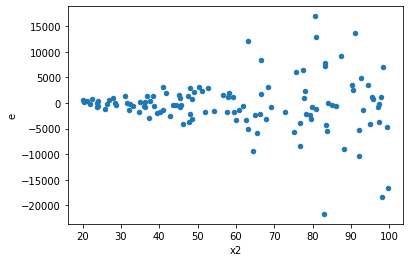

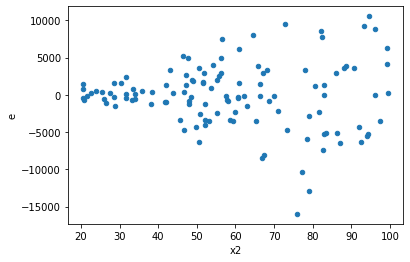

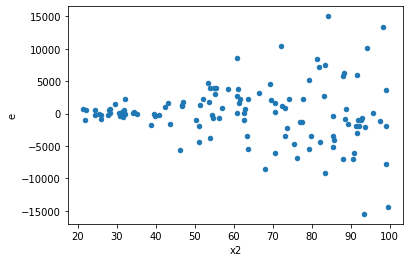

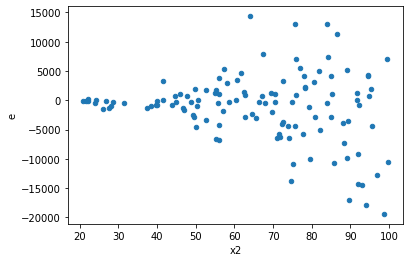

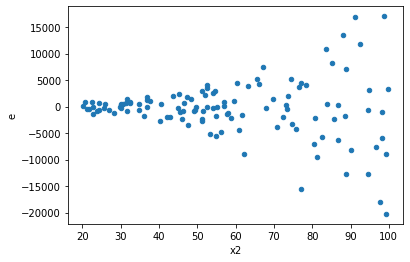

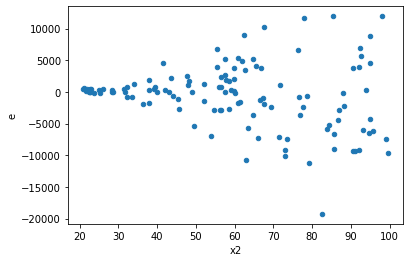

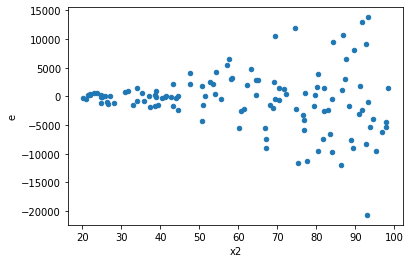

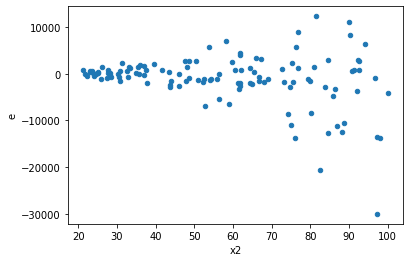

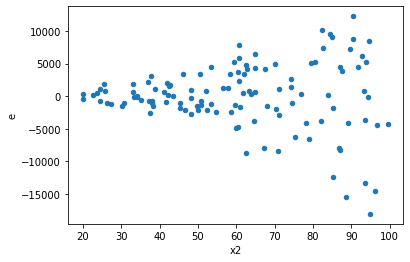

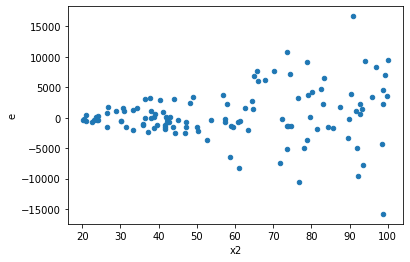

In [13]:
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [14]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
0.0,45.0,45.0,2346902900.487095,100718484.15606014,53338702.283797614,2289056.458092276,23.30161062442761,2.220446049250313e-16,0.9999999999999999,Reject005=0 : Heteroscedasticity
1.0,45.0,45.0,1566312724.0775108,218237427.95641074,35598016.45630706,4959941.54446388,7.177104031808676,8.438398868548802e-10,0.9999999995780801,Reject005=0 : Heteroscedasticity
2.0,45.0,45.0,1737812079.8799524,162659156.14392912,39495729.088180736,3696799.0032711164,10.683764265580276,6.334932578511143e-13,0.9999999999996833,Reject005=0 : Heteroscedasticity
3.0,45.0,45.0,2813027227.2961044,217360771.01771063,63932436.984002374,4940017.523129787,12.94174295630787,1.6209256159527285e-14,0.9999999999999919,Reject005=0 : Heteroscedasticity
4.0,45.0,45.0,3121485160.799836,72000328.74809007,70942844.56363264,1636371.107911138,43.353762615738596,2.220446049250313e-16,0.9999999999999999,Reject005=0 : Heteroscedasticity
5.0,45.0,45.0,2143629629.658366,184946604.69675487,48718855.21950832,4203331.924926247,11.590532484622459,1.3522516439934407e-13,0.9999999999999324,Reject005=0 : Heteroscedasticity
6.0,45.0,45.0,2419117921.895524,88575195.94632909,54979952.77035282,2013072.6351438428,27.311460009203426,2.220446049250313e-16,0.9999999999999999,Reject005=0 : Heteroscedasticity
7.0,45.0,45.0,2850659003.548568,74374331.6561779,64787704.62610381,1690325.7194585884,38.32853270839145,2.220446049250313e-16,0.9999999999999999,Reject005=0 : Heteroscedasticity
8.0,45.0,45.0,2207597251.019285,105703794.6873745,50172664.79589284,2402358.9701676024,20.884749289733545,2.220446049250313e-16,0.9999999999999999,Reject005=0 : Heteroscedasticity


In [17]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,45.0,45.0,2346902900.487095,100718484.15606014,53338702.283797614,2289056.458092276,23.30161062442761,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
1.0,45.0,45.0,1566312724.0775108,218237427.95641074,35598016.45630706,4959941.54446388,7.177104031808676,8.438398868548802e-10,Reject005=0 : Heteroscedasticity
2.0,45.0,45.0,1737812079.8799524,162659156.14392912,39495729.088180736,3696799.0032711164,10.683764265580276,6.334932578511143e-13,Reject005=0 : Heteroscedasticity
3.0,45.0,45.0,2813027227.2961044,217360771.01771063,63932436.984002374,4940017.523129787,12.94174295630787,1.6209256159527285e-14,Reject005=0 : Heteroscedasticity
4.0,45.0,45.0,3121485160.799836,72000328.74809007,70942844.56363264,1636371.107911138,43.353762615738596,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
5.0,45.0,45.0,2143629629.658366,184946604.69675487,48718855.21950832,4203331.924926247,11.590532484622459,1.3522516439934407e-13,Reject005=0 : Heteroscedasticity
6.0,45.0,45.0,2419117921.895524,88575195.94632909,54979952.77035282,2013072.6351438428,27.311460009203426,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
7.0,45.0,45.0,2850659003.548568,74374331.6561779,64787704.62610381,1690325.7194585884,38.32853270839145,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
8.0,45.0,45.0,2207597251.019285,105703794.6873745,50172664.79589284,2402358.9701676024,20.884749289733545,2.220446049250313e-16,Reject005=0 : Heteroscedasticity


In [18]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64